In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
parking_df = pd.read_csv('/content/MyDrive/MyDrive/실전db.csv')
weather_df = pd.read_csv('/content/MyDrive/MyDrive/서울시_기상데이터.csv', encoding="cp949")
traffic = pd.read_excel('/content/MyDrive/MyDrive/2020교통량통합.xlsx')

In [4]:
weather_df.isna().sum()

지점         0
일시         0
기온         1
강수량     7701
풍속         0
습도         0
일조시간    3969
적설량     8552
지면온도       8
지중온도      12
dtype: int64

In [5]:
weather_df["날짜"] = weather_df["일시"].astype(str).str[:10]
weather_df["날짜"] = pd.to_datetime(weather_df["날짜"])
weather_df['월'] = weather_df['날짜'].dt.month

df_list=[]
for month in range(1,13):
  df_list.append(weather_df[weather_df['월']==month])


# 기상청 20년 월별 데이터 평균값으로 채움
df_list[0].fillna({'강수량':60.5, '일조시간':177.9, '적설량':0.3}, inplace=True) #1
df_list[1].fillna({'강수량':53.1, '일조시간':185.0, '적설량':3.9, '지면온도':0.8, '지중온도':1.9}, inplace=True) #2
df_list[2].fillna({'강수량':16.3, '일조시간':262.9, '적설량':0.0}, inplace=True) #3
df_list[3].fillna({'강수량':16.9, '일조시간':283.3, '적설량':0.0}, inplace=True) #4
df_list[4].fillna({'강수량':112.4, '일조시간':177.9, '적설량':0.0, '지중온도':17.4}, inplace=True) #5
df_list[5].fillna({'강수량':139.6, '일조시간':206.1, '적설량':0.0, '지면온도':23.9, '지중온도':23.9}, inplace=True) #6
df_list[6].fillna({'강수량':270.4, '일조시간':119.4, '적설량':0.0, '지면온도':26.0, '지중온도':22.1}, inplace=True) #7
df_list[7].fillna({'강수량':675.7, '일조시간':74.7, '적설량':0.0, '지면온도':27.7, '지중온도':26.5, '기온':26.5}, inplace=True) #8
df_list[8].fillna({'강수량':181.5, '일조시간':174.3, '적설량':0.0}, inplace=True) #9
df_list[9].fillna({'강수량':0.0, '일조시간':227.1, '적설량':0.0}, inplace=True) #10
df_list[10].fillna({'강수량':120.1, '일조시간':171.5, '적설량':0.0}, inplace=True) #11
df_list[11].fillna({'강수량':4.6, '일조시간':203.6, '적설량':3.2}, inplace=True) #12

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [6]:
weather = pd.concat([df_list[0],df_list[1],df_list[2],df_list[3],df_list[4],df_list[5],df_list[6],df_list[7],df_list[8],df_list[9],df_list[10],df_list[11]])
weather

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,날짜,월
0,108,2020-01-01 1:00,-5.9,60.5,1.7,40,177.9,0.3,-2.4,3.2,2020-01-01,1
1,108,2020-01-01 2:00,-5.7,60.5,0.1,42,177.9,0.3,-2.4,3.1,2020-01-01,1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,177.9,0.3,-2.7,3.1,2020-01-01,1
3,108,2020-01-01 4:00,-5.4,60.5,0.0,50,177.9,0.3,-2.5,3.0,2020-01-01,1
4,108,2020-01-01 5:00,-5.2,60.5,0.0,55,177.9,0.3,-2.2,3.0,2020-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,4.6,4.8,54,203.6,3.2,-6.5,2.2,2020-12-30,12
8756,108,2020-12-30 21:00,-12.4,4.6,3.2,58,203.6,3.2,-6.9,2.2,2020-12-30,12
8757,108,2020-12-30 22:00,-12.7,4.6,2.8,56,203.6,3.2,-7.1,2.1,2020-12-30,12
8758,108,2020-12-30 23:00,-12.9,4.6,2.2,54,203.6,3.2,-7.3,2.1,2020-12-30,12


In [7]:
weather.isna().sum()

지점      0
일시      0
기온      0
강수량     0
풍속      0
습도      0
일조시간    0
적설량     0
지면온도    0
지중온도    0
날짜      0
월       0
dtype: int64

In [8]:
daily_weather = weather.groupby("날짜").mean().drop('지점', axis=1)
print(daily_weather.shape) #2020년은 2월 29일이 있었으므로 366 row (o)
daily_weather.head()

(366, 9)


,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,월
날짜,,,,,,,,,
2020-01-01,-2.543478,49.982609,1.152174,62.739130,92.852174,0.286957,-0.917391,2.856522,1.0
2020-01-02,0.987500,60.500000,1.912500,64.875000,96.362500,0.300000,-0.020833,2.625000,1.0
2020-01-03,0.120833,60.500000,1.879167,57.833333,96.729167,0.300000,-0.554167,2.683333,1.0
2020-01-04,1.054167,60.500000,1.895833,50.875000,96.691667,0.300000,-0.395833,2.695833,1.0
2020-01-05,1.175000,60.500000,1.045833,45.666667,96.658333,0.300000,-0.737500,2.629167,1.0


In [9]:
traffic["total"] = traffic[['0시', '1시', '2시', '3시', '4시', '5시',
       '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시',
       '17시', '18시', '19시', '20시', '21시', '22시', '23시']].sum(axis=1)

In [10]:
daily_traffic = traffic.groupby("DATE")["DATE", 'total'].sum()

print(daily_traffic.shape)
daily_traffic.head()

(366, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total
DATE,
2020-01-01,7347299.0
2020-01-02,9326734.0
2020-01-03,9998638.0
2020-01-04,9198233.0
2020-01-05,7868358.0


In [11]:
daily_traffic = daily_traffic.reset_index("DATE")
daily_traffic.isna().sum()

DATE     0
total    0
dtype: int64

In [12]:
daily_df = pd.merge(daily_traffic, daily_weather, left_on='DATE', right_on='날짜')
print(daily_df.shape)
daily_df.rename(columns={'기온':'Temp', '강수량':'Rain', '풍속':'Wind',
                   '습도':'Hum', '일조시간':'Daylight', '적설량':'Snow',
                   '지면온도':'GTemp', '지중온도':'UnderTemp', '월':'Month'}, inplace=True)

(366, 11)


In [13]:
daily_df['Weekday'] = daily_df['DATE'].dt.weekday # 0:월 1:화 2:수 3:목 4:금 5:토 6:일

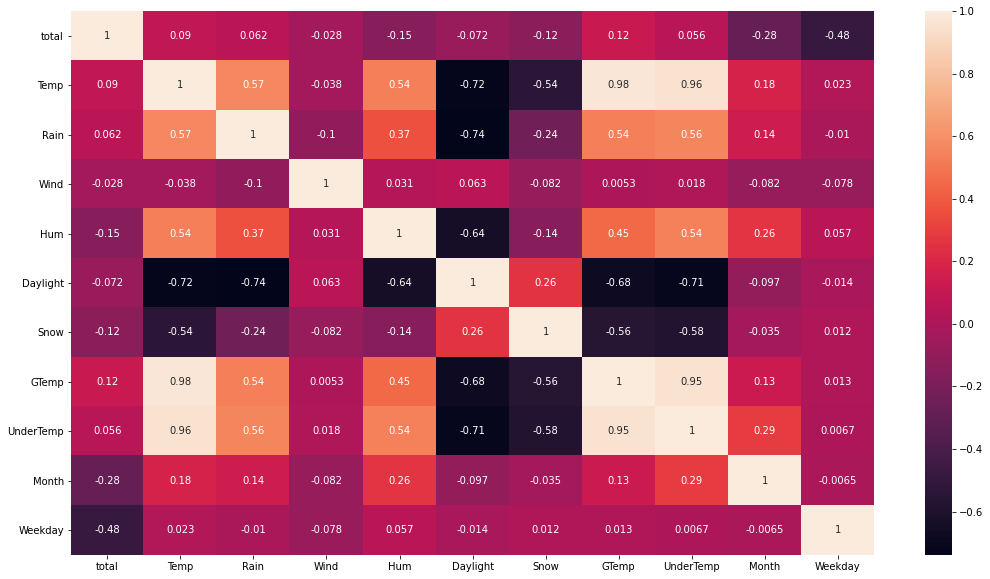

In [14]:
plt.figure(figsize=(18,10))
sns.heatmap(daily_df.corr(), annot=True); # 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

Month  Snow      Rain        Daylight    Temp        Hum        Weekday  total    
12.0   3.200000  4.600000    110.662500   0.983333   46.250000  3        8693298.0    1
4.0    0.000000  16.900000   130.204167   11.741667  34.208333  2        9652973.0    1
                             130.279167   9.079167   40.666667  5        8712870.0    1
                             130.287500   9.170833   42.666667  3        9527859.0    1
                             130.291667   9.995833   53.000000  4        9851595.0    1
                                                                                     ..
9.0    0.000000  15.383333   79.887500    20.241667  84.916667  5        8027462.0    1
                 16.391667   79.887500    24.620833  90.125000  2        8426664.0    1
                 76.987500   80.004167    22.795833  83.500000  3        8446424.0    1
                 106.045833  79.887500    21.945833  77.916667  6        6300836.0    1
1.0    0.286957  49.982609   92.85217

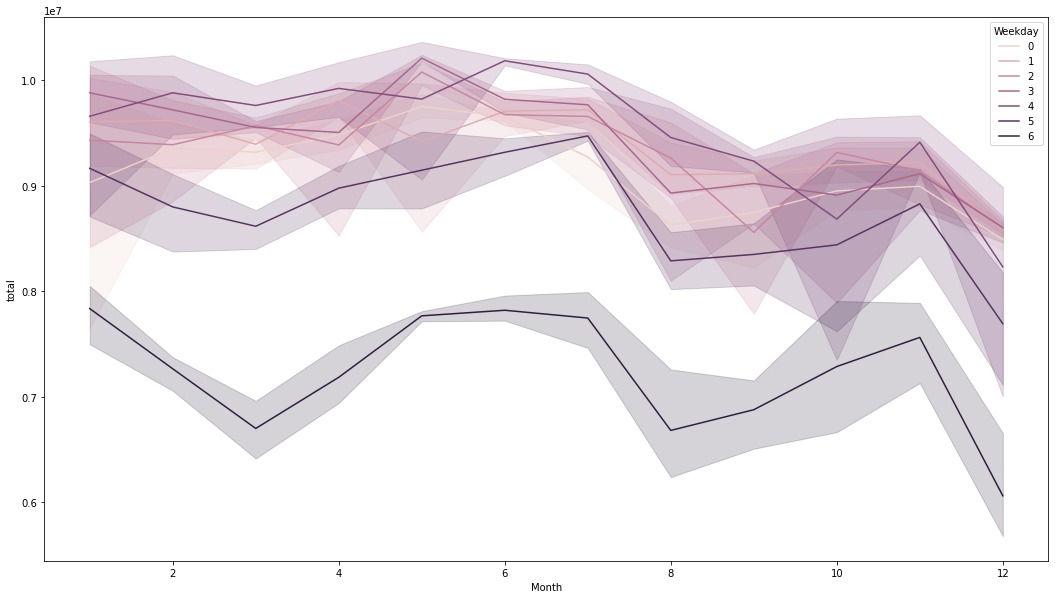

In [15]:
# Total과 연관성이 있는 컬럼 비교
d_1 = daily_df.groupby(['Month','Snow','Rain','Daylight','Temp','Hum','Weekday'])['total'].mean().reset_index()
plt.figure(figsize=(18,10))
sns.lineplot(data=d_1, x='Month', y='total', hue='Weekday') 
d_1.value_counts()

# 트래픽 컬럼 비교


1.   2,8월에 전체적으로 감소 - 강수량과 적설량이 가장 많은 달

2.   전체적으로 주말이 트래픽이 낮음

3.   수,목,금 차이가 있지만 전체적으로 트래픽이 높게 나옴


# 데이터 컬럼의미


1.   USER_ID: 유저ID

2.   JOIN_DATE: 가입일이라고 생각했는데 1970-01-01 이런식으로 70년대도 있어가지고 정확히 뭔지 모르겠음 주차장 운영시작일일수도 있음

3.   D_TYPE: 

4.   STORE_ID: 상점ID

5.   GOODS_TYPE: 주차장관련 어플이니깐 주차권타입???

6.   DATE: 결제일

7.   COUNT: 결제건수

8.   AD1: 매장 지역코드



In [16]:
parking_df['JOIN_DATE'].sort_values()

176320    1970-01-01
625539    1970-01-01
226658    1970-01-01
226415    1970-01-01
226042    1970-01-01
             ...    
879214    2020-12-31
879213    2020-12-31
879212    2020-12-31
879230    2020-12-31
879270    2020-12-31
Name: JOIN_DATE, Length: 879271, dtype: object

In [17]:
parking_df.isna().sum() # NaN은 없음

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
dtype: int64

In [18]:
parking_df.describe() # 컬럼별 요약 통계 지표 출력

,USER_ID,STORE_ID,COUNT
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


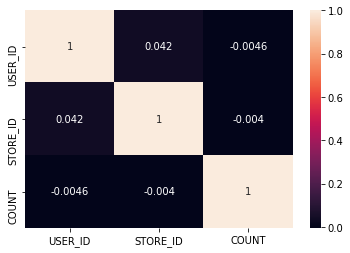

In [19]:
sns.heatmap(parking_df.corr(), annot=True); # 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

In [20]:
parking_df['JOIN_DATE'] = pd.to_datetime(parking_df['JOIN_DATE'])
parking_df['DATE'] = pd.to_datetime(parking_df['DATE'])

In [21]:
parking_df['Weekday'] = parking_df['DATE'].dt.weekday # 0:월 1:화 2:수 3:목 4:금 5:토 6:일
parking_df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,3
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,3
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,3


In [22]:
parking_df= parking_df[parking_df['USER_ID']!=999665]

In [23]:
df = pd.merge(parking_df, daily_df, on = 'DATE')
print(df.shape)
df.drop('Weekday_y', axis=1, inplace=True)
df.rename(columns={'Weekday_x':'Weekday'}, inplace=True)
df

(878905, 20)


,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,total,Temp,Rain,Wind,Hum,Daylight,Snow,GTemp,UnderTemp,Month
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0
878901,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0
878902,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0
878903,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0


In [24]:
seoul = ['JR','J','YO','SOD','GJ','DM','JRR','SB','GB','DB','NW','EP','SD','MP','YC','GS','GR','GHN','YD','DJ','GW','SC','GN','SP','GD']

df_list=[]
for s in df['AD1']:
  if s in seoul:
    df_list.append('seoul')
  else:
    df_list.append('Nseoul')

df['Seoul'] = df_list
df = df[df['Seoul']!='Nseoul']
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,total,Temp,Rain,Wind,Hum,Daylight,Snow,GTemp,UnderTemp,Month,Seoul
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0,seoul
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0,seoul
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0,seoul
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0,seoul
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2,7347299.0,-2.543478,49.982609,1.152174,62.73913,92.852174,0.286957,-0.917391,2.856522,1.0,seoul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878899,1830544,2020-12-31,BB,220745,B,2020-12-31,1,SD,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0,seoul
878900,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0,seoul
878902,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0,seoul
878903,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,3,8324393.0,-12.700000,4.600000,3.400000,52.00000,203.600000,3.200000,-7.600000,2.100000,12.0,seoul


# 전처리 방향


1.   D_TYPE 확실히 뭘 의미하는지 확인

2.   AD1 확실히 뭘 의미하는지 확인

3.   GOODS_TYPE 확실히 뭘 의미하는지 확인

4.   USER_ID 분석

5.   STORE_ID 분석

6.   COUNT 분석


# 1. D_TYPE & AD1 & GOODS_TYPE



# 어플을 확인했을 때 결제 방법으로 카드/ 휴대폰결제 / 네이버 페이 3가지 방법이 있었음 AA / BB / CC는 혹시 결제방법 아닐까??

In [25]:
parking_df.groupby(['USER_ID','STORE_ID','Weekday'])['D_TYPE'].value_counts()

USER_ID  STORE_ID  Weekday  D_TYPE
224      92510     6        AA        1
         181833    2        AA        1
232      28018     0        BB        1
                   1        BB        1
                   5        BB        1
                                     ..
1830551  219886    3        BB        1
1830570  82433     3        BB        1
1830580  92020     3        AA        1
1830589  92437     3        BB        1
1830598  220959    3        AA        1
Name: D_TYPE, Length: 481819, dtype: int64

AA    493166
BB    384541
CC      1198
Name: D_TYPE, dtype: int64


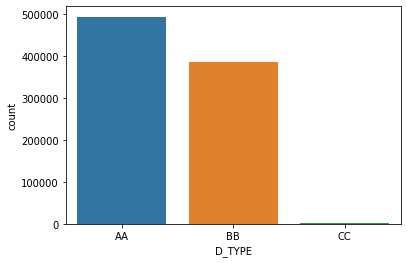

In [26]:
print(parking_df['D_TYPE'].value_counts())
sns.countplot(data=parking_df, x='D_TYPE'); 

In [27]:
parking_df['Month'] = parking_df['DATE'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0.5, 1.0, 'Monthly changes by Temperature')]

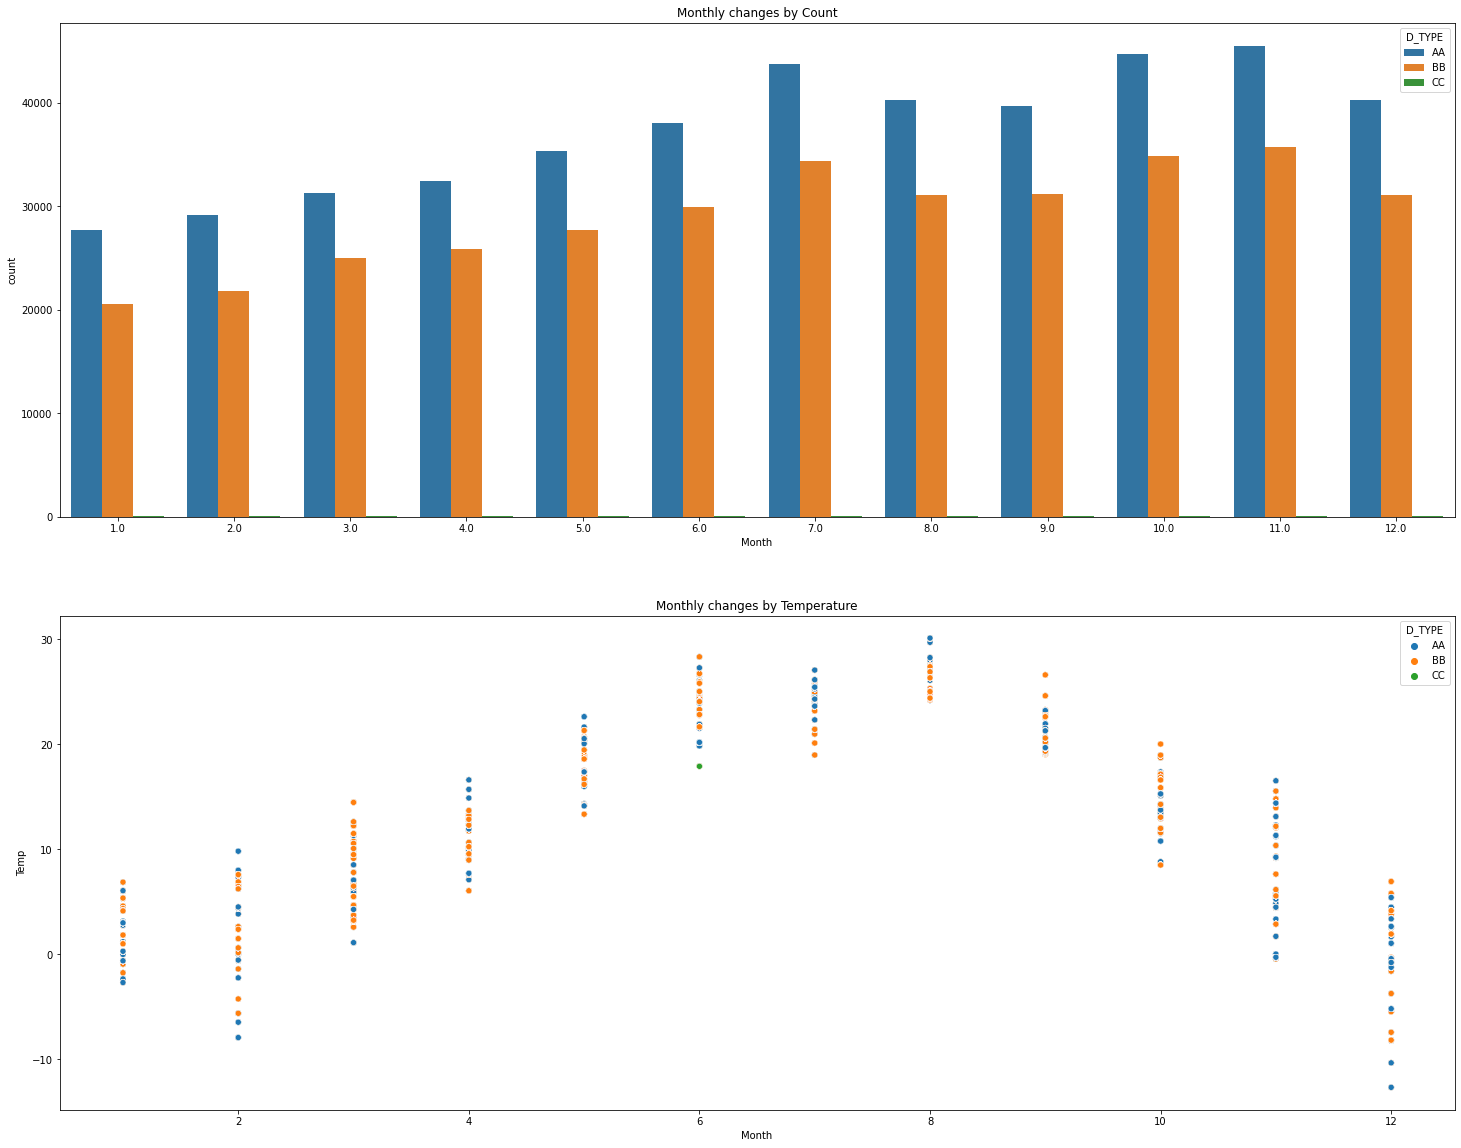

In [28]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=df, x='Month', hue='D_TYPE',ax=ax1).set(title='Monthly changes by Count')
sns.scatterplot(data=df, x="Month", y='Temp',hue="D_TYPE", ax=ax2).set(title='Monthly changes by Temperature')

#D_TYPE은 결제방법이라는 증명할 논리적 증거 부족

단지 7월까지 AA/BB의 상승후 8,9월 하락이후 10,11월 상승 후 12월 하락

---
#계절성을 비교하기 위해서 merge한 df를 활용

온도가 올라갈수로 AA의 결제 비중이 높아짐

결제방법였으면 온도가 올라가도 변화가 없어야 함

주차장의 종류일 가능성이 있을꺼 같음

In [29]:
C_type = pd.DataFrame(parking_df[parking_df['D_TYPE']=='CC'])
C_type.duplicated(keep=False) # 중복 확인 후 제거

print(parking_df['COUNT'].value_counts())
print(C_type['COUNT'].value_counts())

1     863775
2      13519
3       1060
4        271
5        133
6         63
7         36
9         12
8         11
10         6
15         4
11         3
12         3
13         3
23         2
22         1
17         1
19         1
20         1
Name: COUNT, dtype: int64
1    1159
2      33
3       5
4       1
Name: COUNT, dtype: int64


USER_ID  JOIN_DATE   D_TYPE  STORE_ID  GOODS_TYPE  DATE        COUNT  AD1  Weekday  Month
1811081  2020-12-12  AA      109037    A           2020-12-17  7      J    3        12       1
1336281  2019-10-02  AA      109423    A           2020-09-13  9      J    6        9        1
1275260  2019-08-15  AA      92011     A           2020-10-10  7      JRR  5        10       1
                                                   2020-10-24  7      JRR  5        10       1
                                                   2020-11-22  7      JRR  6        11       1
                                                                                            ..
1553982  2020-04-28  BB      220893    A           2020-05-07  7      J    3        5        1
                                                   2020-05-08  9      J    4        5        1
                                                   2020-05-09  7      J    5        5        1
1572434  2020-05-18  AA      1892      B           2020

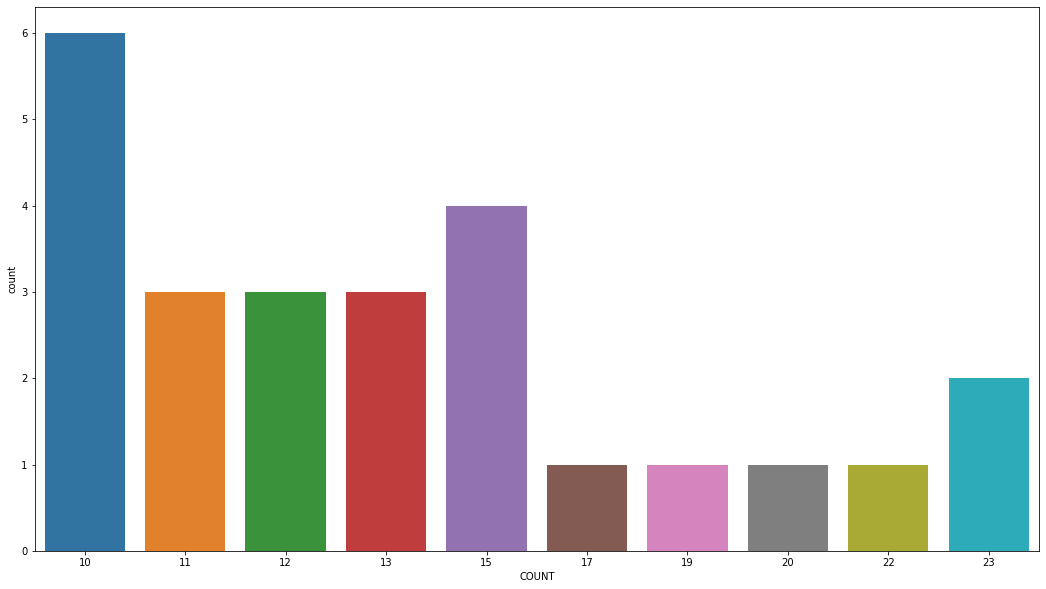

In [30]:
plt.figure(figsize=(18,10))
sns.countplot(data=parking_df[parking_df['COUNT']>9], x="COUNT");
print(parking_df[parking_df['COUNT']>6].value_counts())

USER_ID  JOIN_DATE   D_TYPE  STORE_ID  GOODS_TYPE  DATE        COUNT  AD1  Weekday  Month
1493307  1970-01-01  CC      82433     D           2020-02-10  3      CY   0        2        1
1277650  1970-01-01  CC      92264     C           2020-06-26  4      JRR  4        6        1
1035854  2019-01-14  CC      110399    A           2020-12-09  3      GBC  2        12       1
                             90545     A           2020-08-03  3      GN   0        8        1
                             28018     C           2020-09-18  3      JRR  4        9        1
851134   1970-01-01  CC      190482    A           2020-05-17  3      GN   6        5        1
dtype: int64


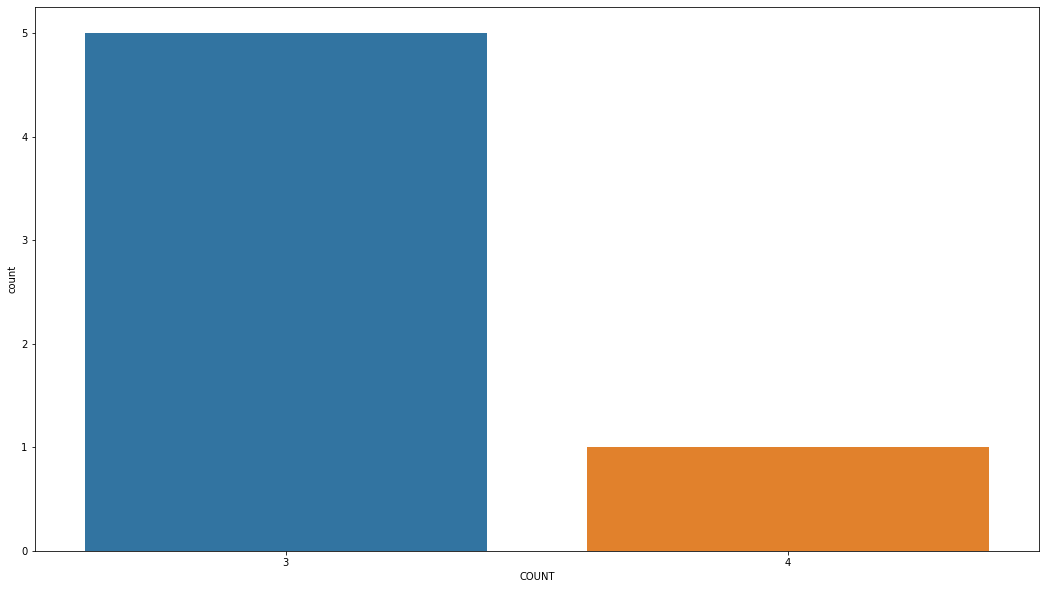

In [31]:
plt.figure(figsize=(18,10))
sns.countplot(data=C_type[C_type['COUNT']>2], x="COUNT");
print(C_type[C_type['COUNT']>2].value_counts())

#parking_df['COUNT'] / CC타입만 추출한 C_type['COUNT']

카운팅 되는 수가 2자리 수 이후 비슷해서 비교를 위해서 9 이후 그래프로 비교

대부분 겹치는 경향이 보임

---

D_type은 카운트와 연관이 되어있는걸까???

In [32]:
cc_1 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='1970-01-01'])
cc_1.duplicated(keep=False)
cc_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD,2,1
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J,3,1
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO,3,1
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD,4,1
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP,4,1
...,...,...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR,5,12
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR,6,12
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD,6,12
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN,1,12


In [33]:
cc_2 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='2018-12-16'])
cc_2.duplicated(keep=False)
cc_2

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
1525,999201,2018-12-16,AA,220655,B,2020-01-02,1,JRR,3,1
1526,999399,2018-12-16,BB,91885,A,2020-01-02,1,YD,3,1
3120,999573,2018-12-16,AA,220440,A,2020-01-03,1,MP,4,1
5033,998863,2018-12-16,AA,182007,A,2020-01-04,1,J,5,1
6917,998805,2018-12-16,AA,82401,A,2020-01-05,1,JRR,6,1
...,...,...,...,...,...,...,...,...,...,...
846263,999243,2018-12-16,BB,173268,A,2020-12-18,1,J,4,12
850940,998842,2018-12-16,BB,1109,A,2020-12-20,1,JRR,6,12
852699,999243,2018-12-16,BB,173268,A,2020-12-21,1,J,0,12
864103,998954,2018-12-16,BB,1109,A,2020-12-25,1,JRR,4,12


In [34]:
cc_3 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='2019-01-14'])
cc_3.duplicated(keep=False)
cc_3

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
394,1036154,2019-01-14,BB,91628,A,2020-01-01,1,YC,2,1
395,1036321,2019-01-14,AA,220295,C,2020-01-01,1,MP,2,1
1561,1035776,2019-01-14,AA,220655,A,2020-01-02,1,JRR,3,1
3164,1035776,2019-01-14,AA,220836,A,2020-01-03,1,JRR,4,1
5084,1035854,2019-01-14,CC,182013,A,2020-01-04,1,MP,5,1
...,...,...,...,...,...,...,...,...,...,...
871599,1036467,2019-01-14,AA,230916,C,2020-12-29,1,JRR,1,12
874354,1035776,2019-01-14,AA,230213,A,2020-12-30,1,JRR,2,12
874355,1035801,2019-01-14,AA,230991,A,2020-12-30,1,J,2,12
874356,1035883,2019-01-14,AA,204547,A,2020-12-30,1,JRR,2,12


# CC타입 JOIN_DATE와 연관이 있는지 확인

같은 날 CC타입만 있는게 아니라 AA / BB도 같이 있음

JOIN_DATE와 D_TYPE은 가입경로 연관성이 부족

In [35]:
qwe = parking_df[parking_df['COUNT']>9]
qwe['USER_ID'].unique()

array([ 656252, 1467323, 1241334,  709657, 1544719, 1407822, 1304663,
        430741, 1635143, 1514190, 1675755, 1675314, 1105111, 1572434,
       1599008, 1613793, 1775410, 1660735])

카운트 수가 2자리수 이상일 때 D_TYPE에 연관이 있는지 다시 확인

In [36]:
print(qwe[qwe['USER_ID']==656252])
print(qwe[qwe['USER_ID']==1467323])
print(qwe[qwe['USER_ID']==1241334])
print(qwe[qwe['USER_ID']==1544719])
print(qwe[qwe['USER_ID']==1407822])
print(qwe[qwe['USER_ID']==1304663])
print(qwe[qwe['USER_ID']==430741])
print(qwe[qwe['USER_ID']==1635143])
print(qwe[qwe['USER_ID']==1514190])
print(qwe[qwe['USER_ID']==1675755])
print(qwe[qwe['USER_ID']==1675314])
print(qwe[qwe['USER_ID']==1105111])
print(qwe[qwe['USER_ID']==1572434])
print(qwe[qwe['USER_ID']==1599008])
print(qwe[qwe['USER_ID']==1613793])
print(qwe[qwe['USER_ID']==1775410])
print(qwe[qwe['USER_ID']==1660735])

       USER_ID  JOIN_DATE D_TYPE  STORE_ID  ... COUNT AD1  Weekday Month
22386   656252 2017-11-22     BB    220745  ...    10  SD        1     1

[1 rows x 10 columns]
        USER_ID  JOIN_DATE D_TYPE  STORE_ID  ... COUNT  AD1  Weekday Month
31925   1467323 2020-01-11     AA    220836  ...    20  JRR        5     1
372116  1467323 2020-01-11     AA    220836  ...    22  JRR        5     6
419592  1467323 2020-01-11     AA    220836  ...    23  JRR        2     7
677929  1467323 2020-01-11     AA    220836  ...    12  JRR        2    10
775274  1467323 2020-01-11     AA    220836  ...    11  JRR        5    11

[5 rows x 10 columns]
       USER_ID  JOIN_DATE D_TYPE  STORE_ID  ... COUNT  AD1  Weekday Month
88268  1241334 2019-07-20     AA      1109  ...    10  JRR        2     2

[1 rows x 10 columns]
        USER_ID  JOIN_DATE D_TYPE  STORE_ID  ... COUNT AD1  Weekday Month
208433  1544719 2020-04-17     BB    221045  ...    19  GN        5     4

[1 rows x 10 columns]
        USER_ID 

사실상 USER_ID 999665 때문에 CC타입의 2자리수에 영향을 줌

999665을 제외한 다른 USER들은 Join_date가 1970 말곤 CC는 없음

# D_TYPE 컬럼 비교


1.   USER_ID 같은 USER_ID는 D_TYPE이 동일함

2.   JOIN_DATE CC인 user와 AA / BB  user가 같이 섞여있음

3.   STORE_ID 같은 STORE_ID인데 CC인 user와 AA / BB가 같이 섞여있음

4.   GOODS_TYPE A,B,C,D 골고루 나옴

5.   DATE 날짜가 제각각임

6.   COUNT CC의 count를 보면 1,2카운트 이후 2자리수 카운트숫자와 

 전체 count 2자리수 카운트숫자랑 비슷 --> 999665으로 인해 제대로 된 분석 아님

7.   AD1 연관이 없음 AD1 1개인 user도 있고 AD1가 다수인 user도 있음

---
USER_ID / STORE_ID가 둘다 D_TYPE에 count가 상승

온도에 따라 AA/BB/CC 변화

어플에서 주차장 종류로 민영 공영 공유 주차장일 가능성도 있음



In [37]:
parking_df['AD1'].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'WH', 'GR',
       'X', 'CVB', 'ADS', 'VO'], dtype=object)

# 서울 지역구
종로구 : JR

중구 : J

용산구 : YO

성동구 : SOD

광진구 : GJ

동대문구 : DM

중랑구 : JRR

성북구 : SB

강북구 : GB

도봉구 : DB

노원구 : NW

은평구 : EP

서대문구 : SD

마포구 : MP

양천구 : YC

강서구 : GS

구로구 : GR

금천구 : GHN

영등포구 : YD

동작구 : DJ

관악구 : GW

서초구 : SC

강남구 : GN

송파구 : SP

강동구 : GD

In [38]:
seoul = ['JR','J','YO','SOD','GJ','DM','JRR','SB','GB','DB','NW','EP','SD','MP','YC','GS','GR','GHN','YD','DJ','GW','SC','GN','SP','GD']

s_list=[]
for s in parking_df['AD1']:
  if s in seoul:
    s_list.append('seoul')
  else:
    s_list.append('Nseoul')

parking_df['Seoul'] = s_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [39]:
parking_df = parking_df[parking_df['Seoul']!='Nseoul']
parking_df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month,Seoul
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2,1,seoul
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2,1,seoul
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2,1,seoul
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2,1,seoul
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2,1,seoul
...,...,...,...,...,...,...,...,...,...,...,...
879265,1830544,2020-12-31,BB,220745,B,2020-12-31,1,SD,3,12,seoul
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,3,12,seoul
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3,12,seoul
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,3,12,seoul


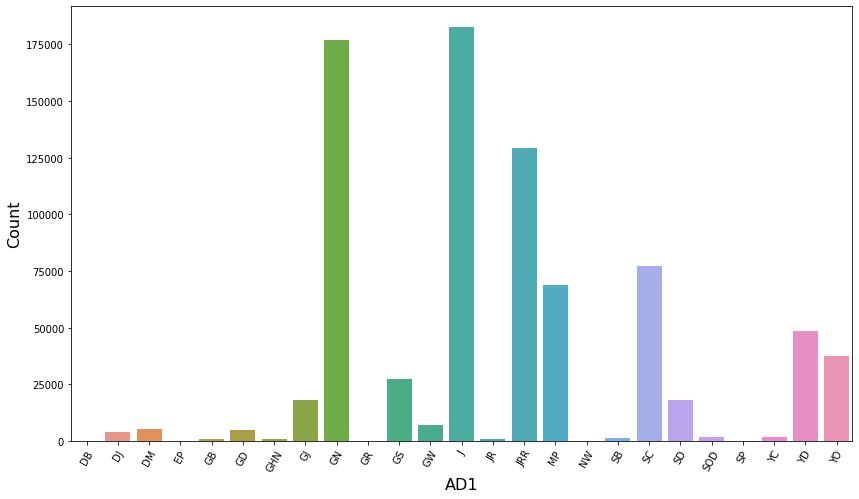

AxesSubplot(0.125,0.125;0.775x0.755)


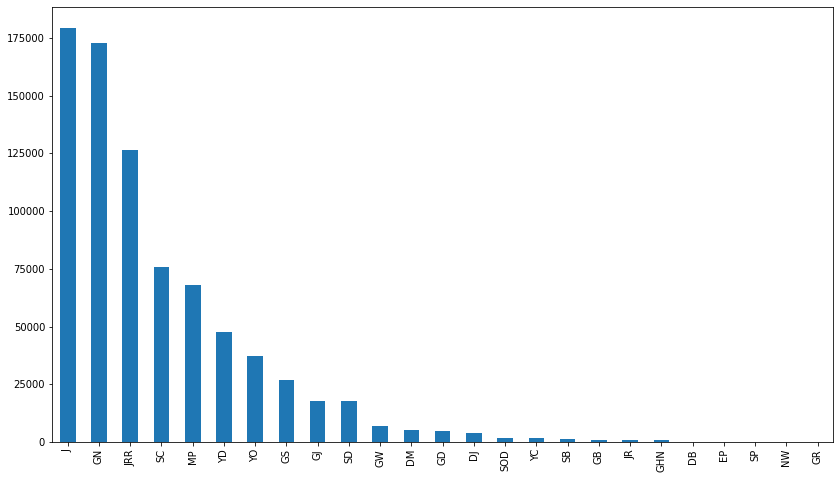

In [40]:
# AD1별 결제건수 시각화
plt.figure(figsize=(14,8))
sns.barplot(x=parking_df.groupby("AD1")["COUNT"].sum().keys(), y=parking_df.groupby("AD1")["COUNT"].sum())
plt.ylabel('Count', fontsize=16)
plt.xlabel('AD1', fontsize=16)
plt.xticks(rotation=60)
plt.show()

#AD1 컬럼 분포 확인
ad1_df=parking_df['AD1'].value_counts()
plt.figure(figsize=(14,8))
print(ad1_df.plot.bar())

In [41]:
ad1 = pd.DataFrame(parking_df.groupby(['AD1','STORE_ID','Weekday']).count())
ad1.duplicated(keep=False) # 중복열 확인 및 제거
ad1['COUNT']

AD1  STORE_ID  Weekday
DB   90595     0           1
               1           1
               3           2
               4           1
     190224    0           2
                          ..
YO   231048    4          14
     231071    0           1
               1           1
               3           2
     231415    2           1
Name: COUNT, Length: 4023, dtype: int64

In [42]:
mon_df = parking_df[parking_df['Weekday']==0]
mon_df= mon_df[['COUNT','AD1','Weekday']]

wed_df = parking_df[parking_df['Weekday']==2]
wed_df = wed_df[['COUNT','AD1','Weekday']]

fri_df = parking_df[parking_df['Weekday']==4]
fri_df = fri_df[['COUNT','AD1','Weekday']]

sat_df = parking_df[parking_df['Weekday']==5]
sat_df = sat_df[['COUNT','AD1','Weekday']]

sun_df = parking_df[parking_df['Weekday']==6]
sun_df = sun_df[['COUNT','AD1','Weekday']]

[Text(0.5, 1.0, 'Fri_AD1')]

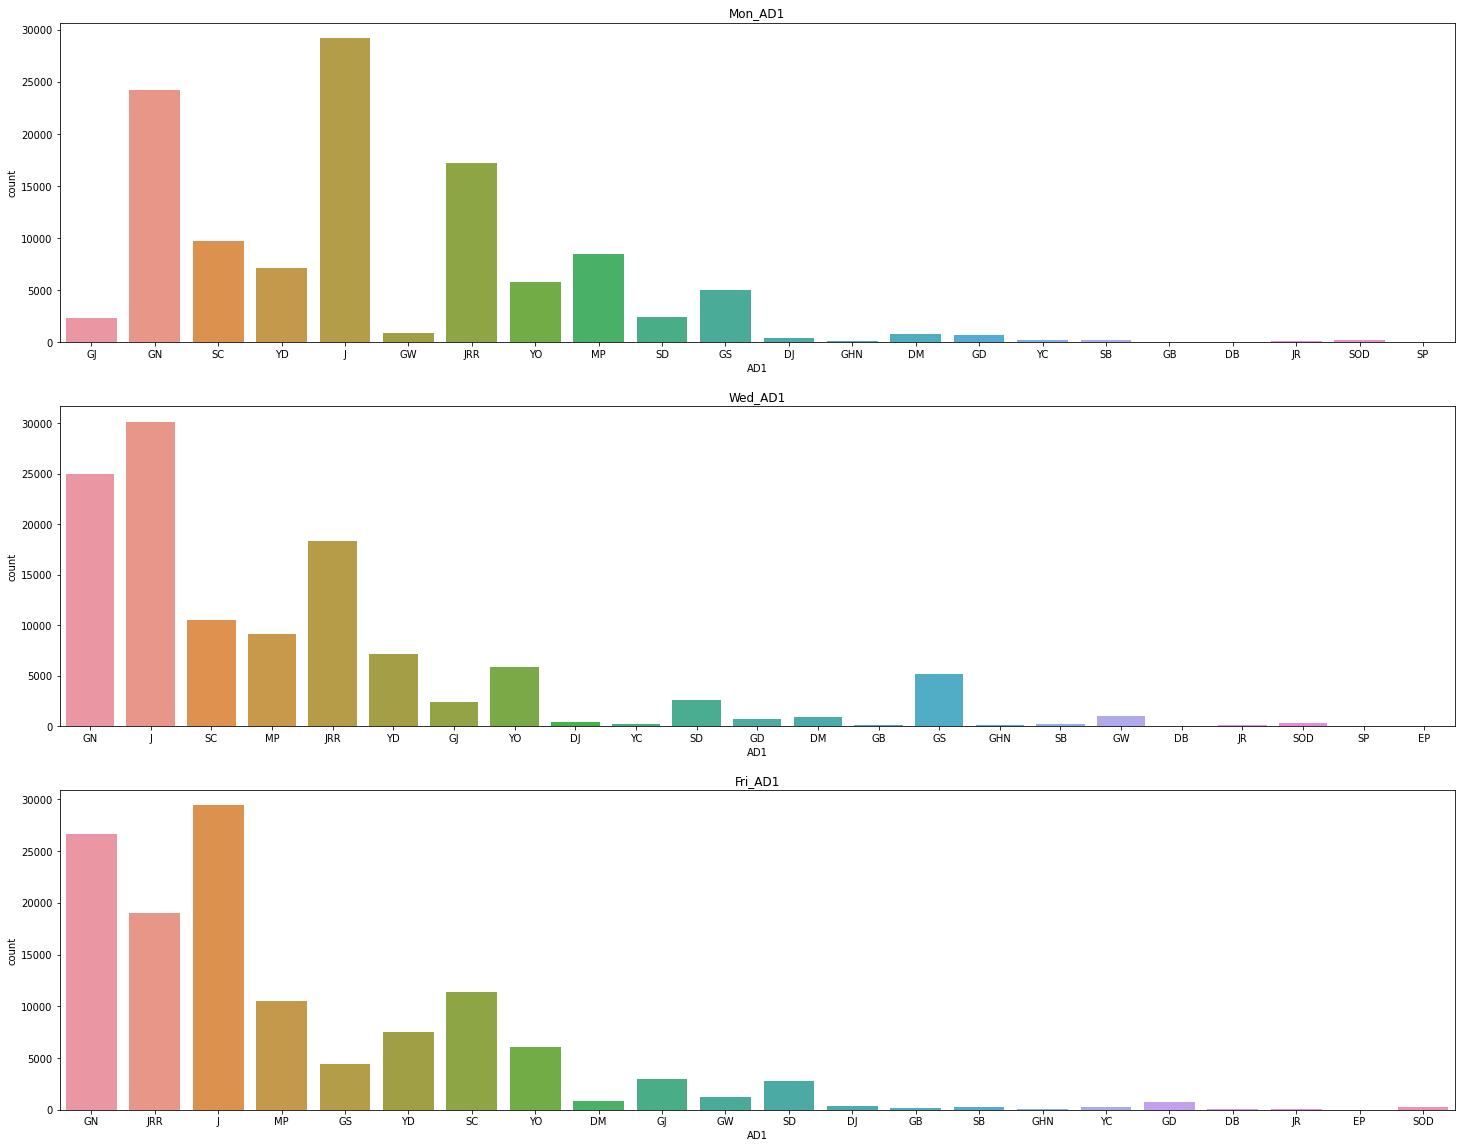

In [43]:
figure, (ax3, ax4, ax5) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=mon_df, x='AD1', ax=ax3).set(title='Mon_AD1')
sns.countplot(data=wed_df, x='AD1', ax=ax4).set(title='Wed_AD1')
sns.countplot(data=fri_df, x='AD1', ax=ax5).set(title='Fri_AD1')


[Text(0.5, 1.0, 'Sun_AD1')]

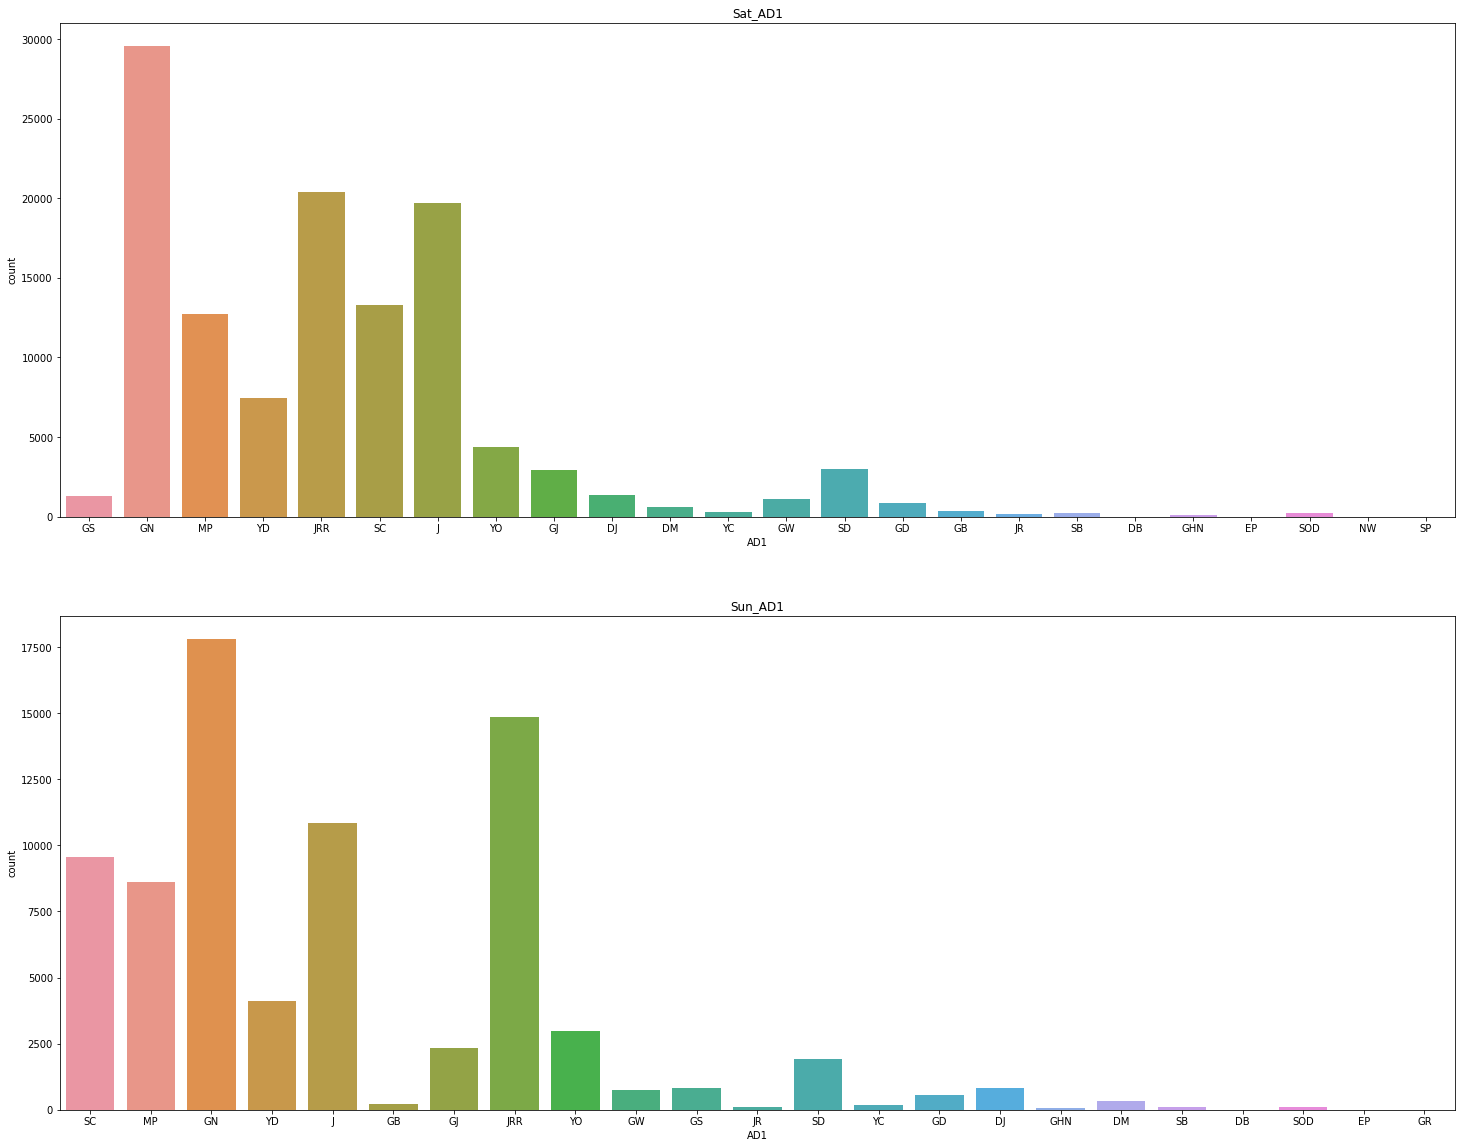

In [44]:
figure, (ax6, ax7) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=sat_df, x='AD1', ax=ax6).set(title='Sat_AD1')
sns.countplot(data=sun_df, x='AD1', ax=ax7).set(title='Sun_AD1')

# 평일

J / GN / JRR / SC / MP

---
# 주말

GN / JRR / J / SC / MP


---
# 비교

J: 평일 -> 주말 급감 --> 회사근처 주차장일 가능성이 높음

GN: 평일 -> 주말의 차이가 크지 않음 --> 회사와 유동인구가 많은 지역일 가능성이 높음

JRR: 평일 -> 주말 상승 --> 회사보다는 유동인구가 많은 지역일 가능성이 높음

SC: 평일 -> 주말의 차이가 크지 않음 --> 회사와 유동인구가 비슷한 지역일 가능성이 높음

MP: 평일 -> 주말의 차이가 크지 않음 --> 회사와 유동인구가 비슷한 지역일 가능성이 높음

# 모두의 주차장 홈페이지에서 예시 

평일 당일권 / 3시간권(시간은 주차장마다 다름) / 평일 심야권 / 휴일 당일권 이렇게 예시를 들고 있음

Goods type으로 주차권 타입이 가능성이 높음

In [45]:
parking_df['GOODS_TYPE'].value_counts()

A    548956
C    122342
B    109755
D     17368
Name: GOODS_TYPE, dtype: int64

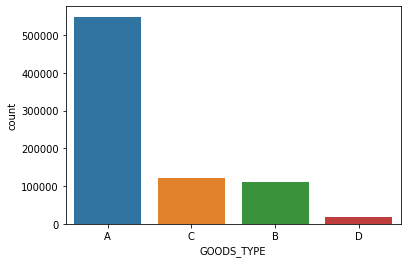

In [46]:
sns.countplot(data=parking_df, x='GOODS_TYPE');

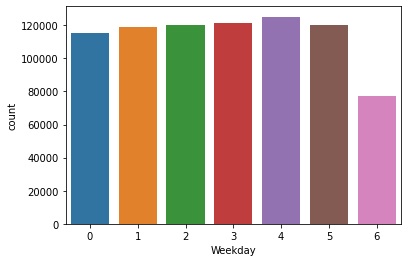

In [47]:
sns.countplot(data=parking_df, x='Weekday');

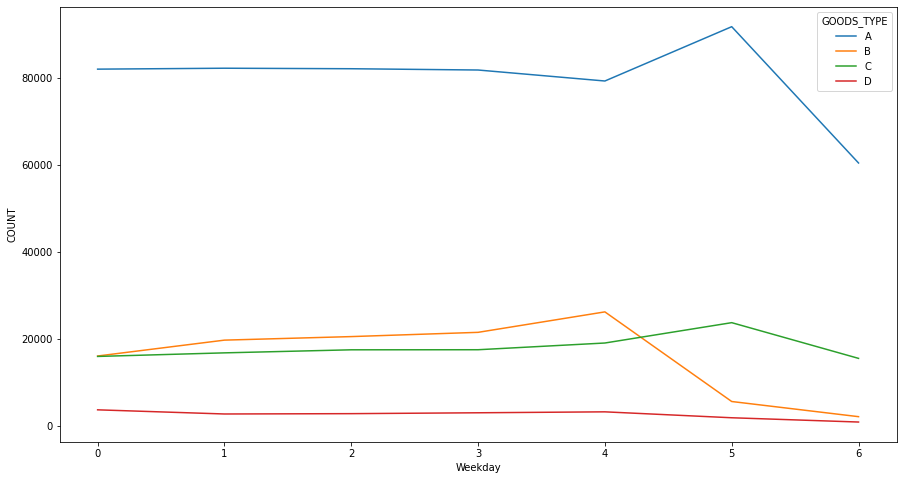

In [48]:
counts_week = parking_df.groupby(['Weekday','GOODS_TYPE'])['COUNT'].sum().reset_index()
counts_weekday = counts_week[['Weekday','GOODS_TYPE','COUNT']]
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Weekday', y = 'COUNT', hue = 'GOODS_TYPE', data = counts_weekday);

# 요일 비교로 GOODS_TYPE 구분



1.   주말에 C가 증가하는걸 보면 C는 휴일 당일권일 가능성이 높음

2.   주말에 D가 감소하는걸 보면 D는 평일 심야권일 가능성이 높음

3.   주말에 B가 감소하는걸 보면 B는 평일 당일권일 가능성이 높음

4.   남은 A는 시간권일 가능성이 높음


---

# 요일 카운터로 비교

금요일까지 증가하다가 주말에 감소하는 경향이 보임


# USER_ID  & STORE_ID 분석

*   결제를 여러번한 유저 확인 후 등급 나누기

*   COUNT가 많은 STORE 확인 후 등급 나누기


In [49]:
# 충성도 높은 유저 찾기

user_df = df.groupby(['USER_ID','AD1','Temp','total','D_TYPE'])['COUNT'].sum().reset_index()

user_df['Rating'] = ''
user_df['Rating'][user_df['COUNT']==1] = 'Bronze' 
user_df['Rating'][(user_df['COUNT']>1) & (user_df['COUNT']<=3)] = 'Silver'
user_df['Rating'][(user_df['COUNT']>3) & (user_df['COUNT']<=5)] = 'Gold'
user_df['Rating'][(user_df['COUNT']>5) & (user_df['COUNT']<=7)] = 'Platinum'
user_df['Rating'][(user_df['COUNT']>7) & (user_df['COUNT']<=9)] = 'Diamond'
user_df['Rating'][user_df['COUNT']>9] = 'VIP'

user_df['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

Bronze      784777
Silver       13143
Gold           365
Platinum        89
VIP             24
Diamond         23
Name: Rating, dtype: int64

In [50]:
# 결제율이 좋은 STORE 찾기

store_df = df.groupby(['STORE_ID','AD1','total','Temp','D_TYPE'])['COUNT'].sum().reset_index()

store_df['Rating'] = ''
store_df['Rating'][store_df['COUNT']==1] = 'Bronze' 
store_df['Rating'][(store_df['COUNT']>1) & (store_df['COUNT']<=5)] = 'Silver'
store_df['Rating'][(store_df['COUNT']>5) & (store_df['COUNT']<=9)] = 'Gold'
store_df['Rating'][(store_df['COUNT']>9) & (store_df['COUNT']<=15)] = 'Platinum'
store_df['Rating'][(store_df['COUNT']>15) & (store_df['COUNT']<=20)] = 'Diamond'
store_df['Rating'][store_df['COUNT']>20] = 'VIP'

store_df['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

Silver      64842
Bronze      46482
Gold        19889
Platinum    11545
VIP          6780
Diamond      4689
Name: Rating, dtype: int64

Bronze      784777
Silver       13143
Gold           365
Platinum        89
VIP             24
Diamond         23
Name: Rating, dtype: int64
Silver      64842
Bronze      46482
Gold        19889
Platinum    11545
VIP          6780
Diamond      4689
Name: Rating, dtype: int64


[Text(0.5, 1.0, 'STORE_AD1')]

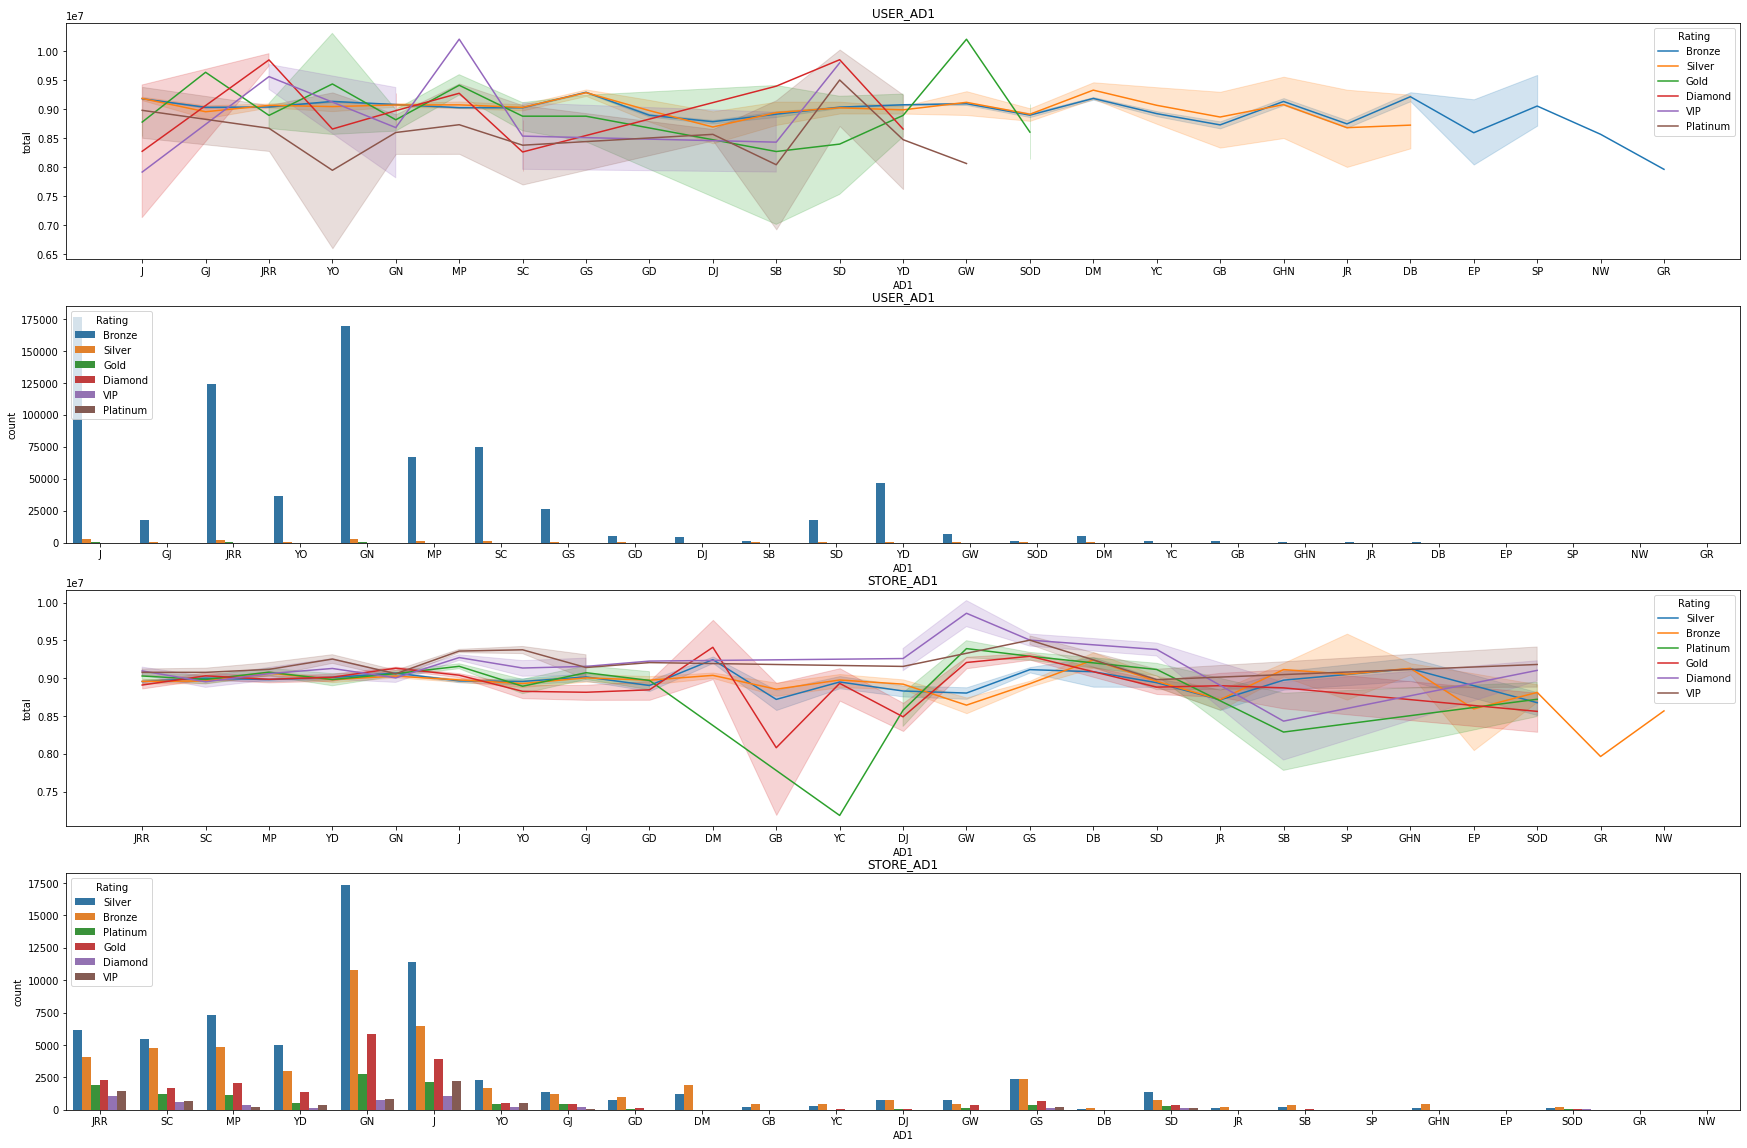

In [51]:
print(user_df['Rating'].value_counts())
print(store_df['Rating'].value_counts())
figure, (ax8, ax9, ax10, ax11) = plt.subplots(nrows=4, ncols=1)
figure.set_size_inches(30,20)

sns.lineplot(data=user_df, x='AD1', y='total',hue='Rating', ax=ax8).set(title='USER_AD1')
sns.countplot(data=user_df, x='AD1', hue='Rating', ax=ax9).set(title='USER_AD1')
sns.lineplot(data=store_df, x='AD1', y='total',hue='Rating',ax=ax10).set(title='STORE_AD1')
sns.countplot(data=store_df, x='AD1', hue='Rating',ax=ax11).set(title='STORE_AD1')

# User


*   Bronze - Silver - Gold - Platinum - Diamond = Vip

*   J -> GN -> JRR -> SC -> MP 

*   AD1 결과에 의해 대부분 유저가 회사와 유동인구 지역을 이용하는 User들일 가능성이 높음

*   J: Silver User의 트래픽이 가장 많음

*   GN:Silver User의 트래픽이 가장 많음

*   JRR: Diamond User의 트래픽이 가장 많음

*   SC: Silver User의 트래픽이 가장 많음

*   MP: Platinum User의 트래픽이 가장 많음








---
# Store

*   Silver - Bronze - Gold - Platinum - Vip - Diamond 순서

*   GN -> J -> MP -> SC -> JRR

*   AD1 결과에 의해 대부분 회사와 유동인구 지역을 이용하는 Store들일 가능성이 높음

*   J: Vip Store의 트래픽이 가장 많음

*   GN: Gold Store의 트래픽이 가장 많음

*   JRR: Vip Store의 트래픽이 가장 많음

*   SC: Vip Store의 트래픽이 가장 많음

*   MP: Vip Store의 트래픽이 가장 많음

---
# User / Store  AD1 비교


*   User의 AD1 J GN SC는 Silver유저의 트래픽이 가장 많이 관측

 많은 비율을 차지하고 있는 Silver유저 타겟하는 것이 좋아보임

*   Store의 AD1 GN만 Gold Store의 트래픽이 가장많이 관측

 대부분은 Vip Store이므로 GN의 Store를 타겟을 잡는것이 좋아보임






# Modeling

In [52]:
col = ['AD1','Temp','total','D_TYPE','COUNT']
user_df.drop(col, axis=1, inplace=True)

In [53]:
df = pd.merge(df, user_df, how='left', on='USER_ID')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import tensorflow as tf

In [ ]:
week3_df = pd.get_dummies(df, columns=['Rating','AD1','GOODS_TYPE'])
week3_df